In [1]:
%matplotlib inline
#some basic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.lines as mlines

#TODO: add your imports here


#seting up some styles
import seaborn as sns
sns.set_context("paper")
sns.set_style("whitegrid")

#avoid Font-problem in plots for ACM/IEEE papers
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

experiment_name = "Tracing"
from load import load

## Experiment Plots

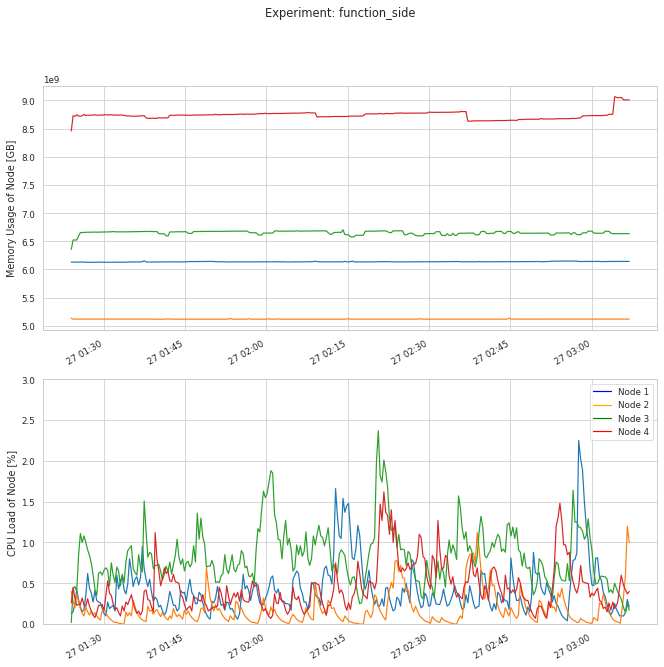

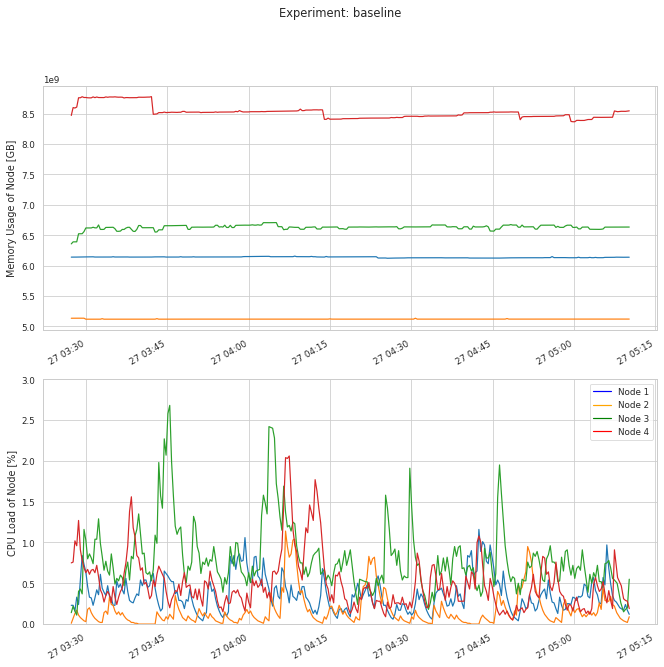

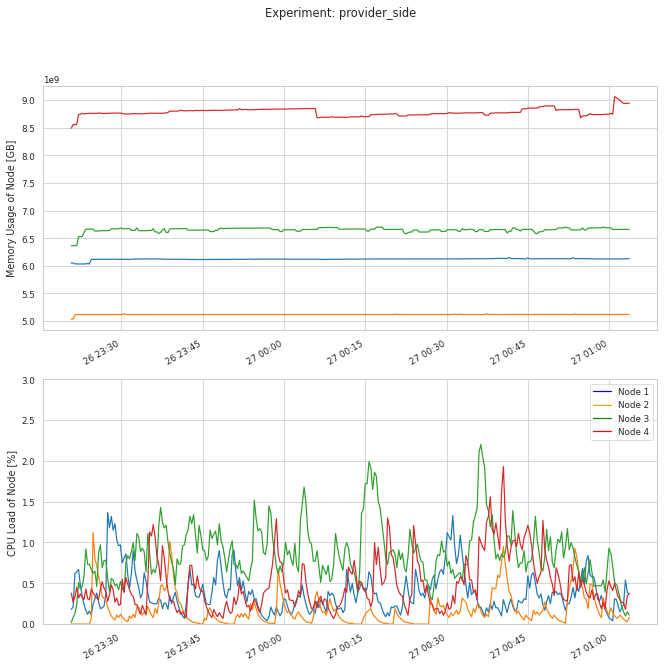

In [2]:
activations,perfromance = load()

experimentes = perfromance["experiment"].unique()

for exp in experimentes:
    fig = plt.figure(figsize=(11,11))
    gs = fig.add_gridspec(ncols=1, nrows=2,hspace=0.20)
    X = perfromance[perfromance["experiment"] == exp]
    mem = X.groupby(["node"]).resample("5m")["node_memory_Active"]
    ax = fig.add_subplot(gs[0])
    ax.set_ylabel("Memory Usage of Node [GB]")
    mem.plot(ax=ax)

    cpu = X.groupby(["node"]).resample("5m")["node_load1"]
    ax = fig.add_subplot(gs[1])
    ax.set_ylabel("CPU Load of Node [%]")
    cpu.plot(ax=ax)
    ax.set_ylim([0.0,3.0])
    # plt.legend()
    blue_patch = mlines.Line2D([], [], color='blue', label='Node 1')
    orange_patch = mlines.Line2D([], [], color='orange', label='Node 2')
    green_patch = mlines.Line2D([], [], color='green', label='Node 3')
    red_patch = mlines.Line2D([], [], color='red', label='Node 4')
    plt.legend(handles=[blue_patch, orange_patch, green_patch, red_patch], loc='upper right')
    
    plt.suptitle('Experiment: {}'.format(exp))




In [3]:
activations,perfromance = load(only_fetchImages=True)
experimentes = perfromance["experiment"].unique()

activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["experiment"])["ELat"].describe(percentiles=[.50,.90,.99])

,count,mean,std,min,50%,90%,99%,max
experiment,,,,,,,,
baseline,196.0,77.526561,19.564384,0.005,76.9480,93.7070,119.34940,121.909
function_side,190.0,77.369758,18.591963,0.012,80.2825,83.0266,88.94974,198.414
provider_side,196.0,79.119051,16.407624,0.012,80.7230,83.9830,89.97830,204.264


In [4]:
activations,perfromance = load(only_fetchImages=True)
experimentes = perfromance["experiment"].unique()

perfromance.groupby(["experiment"])["node_memory_Active"].describe(percentiles=[.50,.90,.99])

,count,mean,std,min,50%,90%,99%,max
experiment,,,,,,,,
baseline,1200.0,6.602638e+09,1.236600e+09,5.119644e+09,6.256908e+09,8.523728e+09,8.769350e+09,8.777224e+09
function_side,1200.0,6.661111e+09,1.319710e+09,5.117768e+09,6.255882e+09,8.746692e+09,8.793635e+09,9.067495e+09
provider_side,1200.0,6.665927e+09,1.337957e+09,5.033951e+09,6.255798e+09,8.775339e+09,8.890988e+09,9.059828e+09


In [5]:
activations,perfromance = load(only_fetchImages=True)
experimentes = perfromance["experiment"].unique()

perfromance.groupby(["experiment"])["node_load1"].describe(percentiles=[.50,.90,.99])

,count,mean,std,min,50%,90%,99%,max
experiment,,,,,,,,
baseline,1200.0,0.459658,0.383147,0.0,0.39,0.890,1.9801,2.68
function_side,1200.0,0.468708,0.372542,0.0,0.37,0.970,1.6806,2.37
provider_side,1200.0,0.478525,0.379382,0.0,0.38,1.001,1.6503,2.20


In [6]:
activations,perfromance = load(only_fetchImages=False, skip_failed=False)
experimentes = perfromance["experiment"].unique()

activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["enviroment","experiment"])["ELat"].describe(percentiles=[.50,.90,.99])


count       mean        std    min      50%  \
enviroment    experiment                                                   
data/failiure function_side   30.0  57.751467  39.655205  0.325  84.3775   
              provider_side   28.0  54.000857  39.729402  0.073  79.2945   
data/normal   baseline       296.0  51.838966  39.408884  0.005  75.4470   
              function_side  290.0  51.059090  39.339011  0.012  78.5950   
              provider_side  296.0  52.813331  39.253060  0.012  78.9165   

                                 90%        99%      max  
enviroment    experiment                                  
data/failiure function_side  87.6807   97.27156   97.485  
              provider_side  86.3136   89.97484   90.247  
data/normal   baseline       90.5980  116.08970  121.909  
              function_side  82.5175   88.10730  198.414  
              provider_side  82.9840   87.45300  204.264

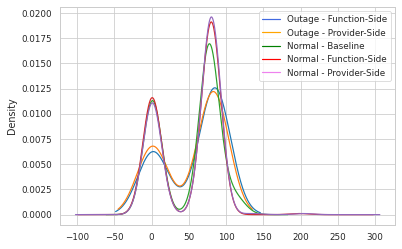

In [7]:
activations,perfromance = load(only_fetchImages=False, skip_failed=False)
experimentes = perfromance["experiment"].unique()

activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["enviroment","experiment"])["ELat"].describe()

ax = activations.groupby(["enviroment","experiment"])["ELat"].plot.kde()
# ax.set_ylabel("CPU Load of Node[%]")

#plt.legend()
fn_patch = mlines.Line2D([], [], color='royalblue', label='Outage - Function-Side')
pr_patch = mlines.Line2D([], [], color='orange', label='Outage - Provider-Side')
ba_patch = mlines.Line2D([], [], color='green', label='Normal - Baseline')
fnn_patch = mlines.Line2D([], [], color='red', label='Normal - Function-Side')
prn_patch = mlines.Line2D([], [], color='purple', label='Normal - Provider-Side')
plt.legend(handles=[fn_patch, pr_patch, ba_patch, fnn_patch, prn_patch], loc='upper right')

<ipython-input-8-cb7eb43f0339>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["EStart"] = (Y.index-experimentStartTime).total_seconds()//60
<ipython-input-8-cb7eb43f0339>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["EStart"] = (Y.index-experimentStartTime).total_seconds()//60
<ipython-input-8-cb7eb43f0339>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

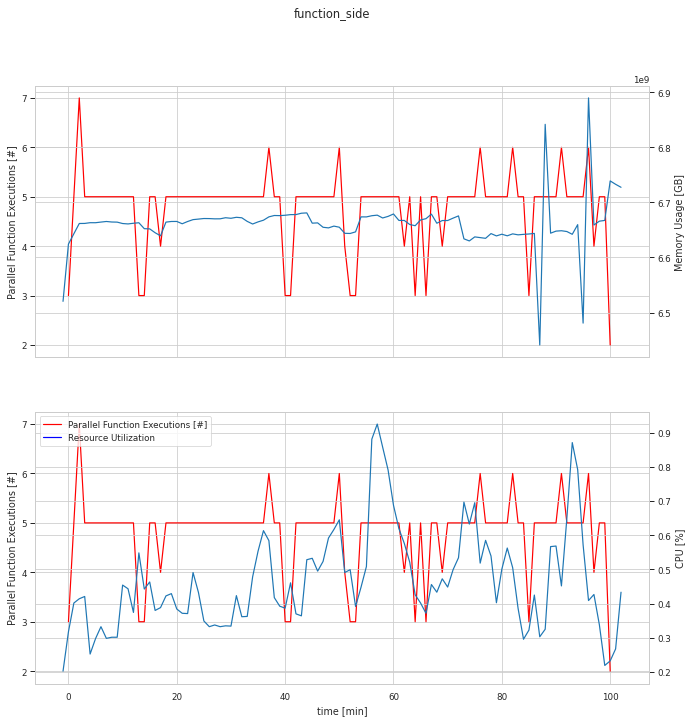

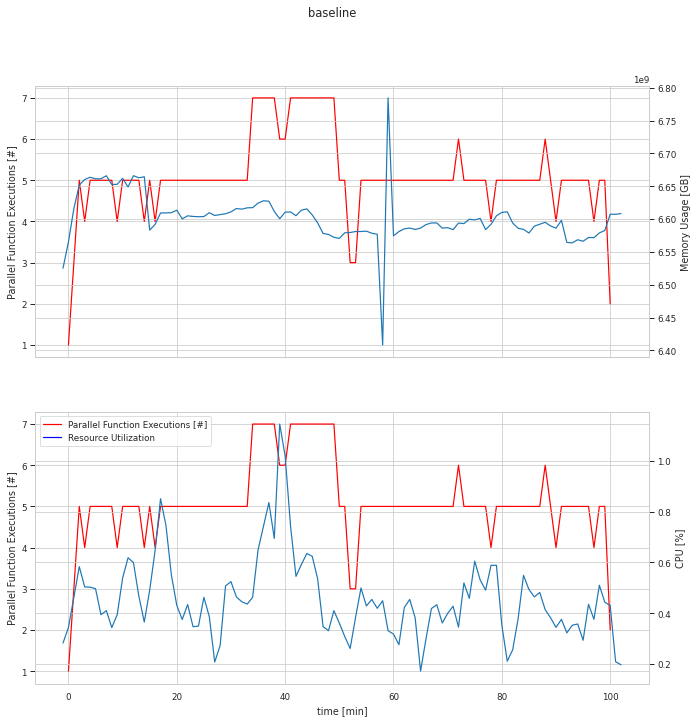

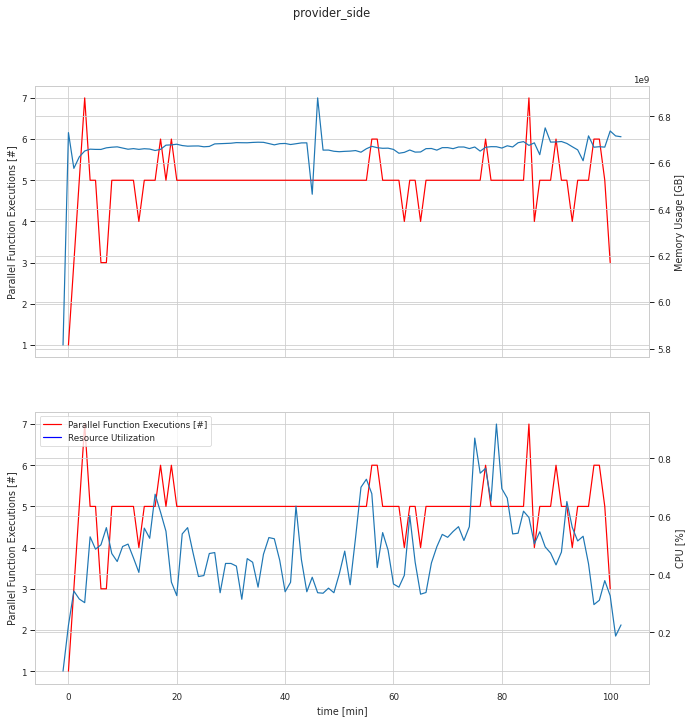

In [8]:
activations,perfromance = load(only_fetchImages=False, skip_failed=True)
experimentes = perfromance["experiment"].unique()

activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["enviroment","experiment"])["ELat"].describe()

for exp in experimentes:
    X = activations[activations["experiment"] == exp]
    experimentLengthInMinutes = round((X["end"].max()-X["start"].min()).total_seconds()/60)
    experimentStartTime = X["start"].min()
    executions = np.zeros(experimentLengthInMinutes+1)
    for i,a in X.iterrows():
        start = round((a["start"]-experimentStartTime).total_seconds()/60)
        end = round((a["end"]-experimentStartTime).total_seconds()/60)
        for i in range(start,end):
            executions[i] +=1
        executions[end] +=1

    Y = perfromance[perfromance["experiment"] == exp]
    #timeshift to corrent for provider side time?
    Y.index = Y.index.shift(-2,freq="h")
    Y[Y.index < X["end"].max()]
    Y["EStart"] = (Y.index-experimentStartTime).total_seconds()//60
    mem = Y.groupby(["EStart"])["node_memory_Active"].mean()
    cpu = Y.groupby(["EStart"])["node_load1"].mean()
    fig = plt.figure(figsize=(11,11))
    plt.suptitle(exp)
    gs = fig.add_gridspec(ncols=1, nrows=2,hspace=0.20)
    ax = fig.add_subplot(gs[0])
    sns.lineplot(range(0,len(executions)),executions,ax=ax,color="r")
    ax.set_ylabel("Parallel Function Executions [#]")
    ax.set_xlabel("Time [min]")

    ax = ax.twinx()
    mem.plot(ax=ax)

    ax.set_ylabel("Memory Usage [GB]")


    ax = fig.add_subplot(gs[1])
    sns.lineplot(range(0,len(executions)),executions,ax=ax,color="r")
    ax.set_ylabel("Parallel Function Executions [#]")
    ax.set_xlabel("time [min]")
    ax = ax.twinx()
    cpu.plot(ax=ax)
    ax.set_ylabel("CPU [%]")
    red_patch = mlines.Line2D([], [], color='red', label='Parallel Function Executions [#]')
    blue_patch = mlines.Line2D([], [], color='blue', label='Resource Utilization')
    plt.legend(handles=[red_patch, blue_patch], loc='upper left')
   




In [9]:
activations,perfromance = load(only_fetchImages=False, skip_failed=False)
experimentes = perfromance["experiment"].unique()

activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["enviroment","experiment"])["ELat"].describe()

for env  in activations["enviroment"].unique():
    for exp in experimentes:
        X = activations[activations["experiment"] == exp]
        X = X[X["enviroment"] == env]
        print(X["end"].max(),X["start"].min(),env,exp)

2020-08-27 01:04:24.179000 2020-08-26 23:24:02.625000 data/normal function_side
2020-08-27 03:07:40.502000 2020-08-27 01:27:17.797000 data/normal baseline
2020-08-26 23:01:16.128000 2020-08-26 21:20:47.837000 data/normal provider_side
2020-08-31 10:31:20.410000 2020-08-31 10:20:48.543000 data/failiure function_side
NaT NaT data/failiure baseline
2020-08-31 09:47:09.393000 2020-08-31 09:36:43.567000 data/failiure provider_side


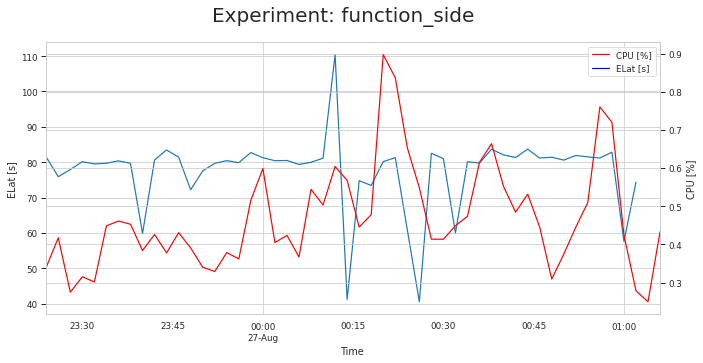

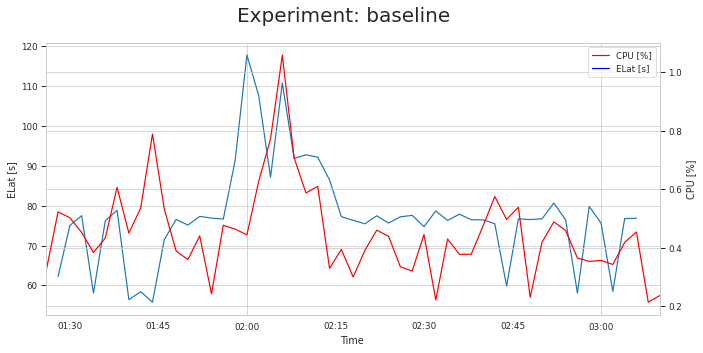

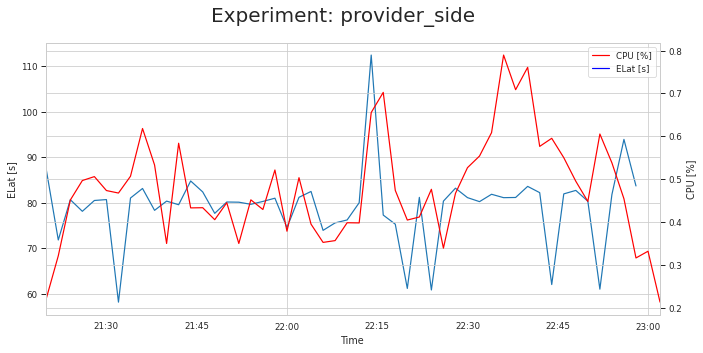

In [10]:
activations,perfromance = load(only_fetchImages=True, skip_failed=False)
experimentes = perfromance["experiment"].unique()

activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["enviroment","experiment"])["ELat"].describe()

for exp in experimentes:
    fig = plt.figure(figsize=(11,5))
    fig.suptitle('Experiment: {}'.format(exp), fontsize=20)
    gs = fig.add_gridspec(ncols=1, nrows=1,hspace=0.20)
    X = activations[activations["experiment"] == exp]
    ax = fig.add_subplot(gs[0])
    X.set_index("start").resample("2min")["ELat"].mean().plot(ax=ax, label="ELat [s]")
    ax.set_ylabel("ELat [s]")
    ax.set_xlabel("Time")
    X = perfromance[perfromance["experiment"] == exp]
    X.index = X.index.shift(-2,freq="h")
    cpu = X.resample("2min")["node_load1"].mean()
    ax = ax.twinx()
    ax.set_ylabel("CPU [%]")

    cpu.plot(ax=ax,color="r", label="CPU [%]")
    red_patch = mlines.Line2D([], [], color='red', label='CPU [%]')
    blue_patch = mlines.Line2D([], [], color='blue', label='ELat [s]')
    plt.legend(handles=[red_patch, blue_patch])

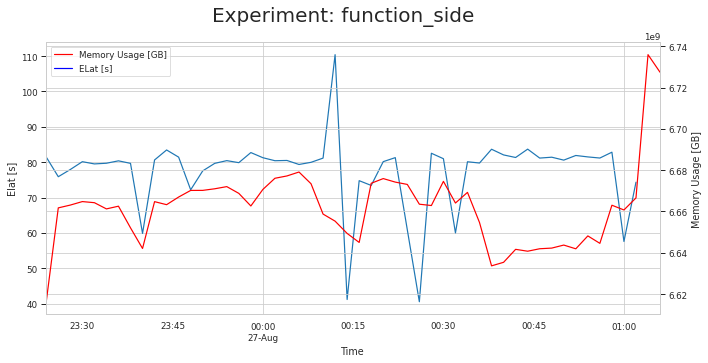

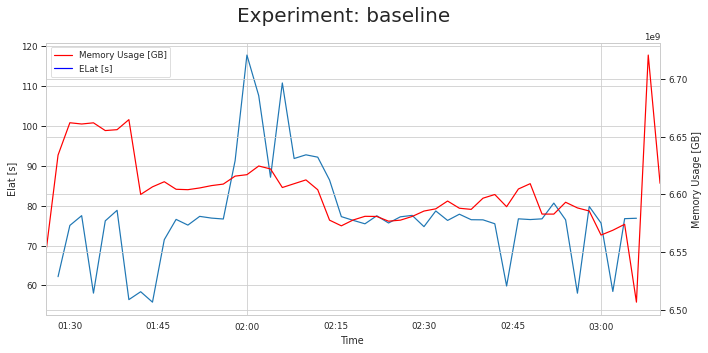

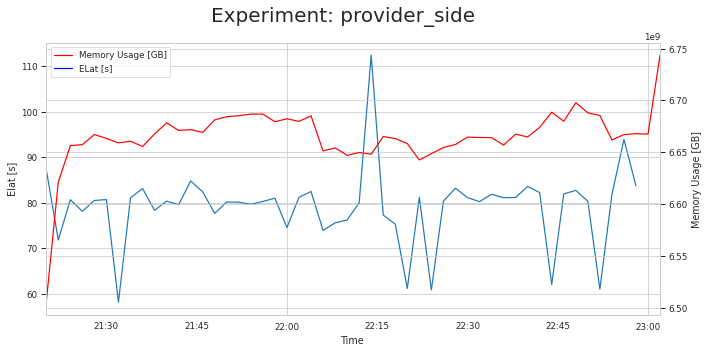

In [11]:
activations,perfromance = load(only_fetchImages=True, skip_failed=False)
experimentes = perfromance["experiment"].unique()

activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["enviroment","experiment"])["ELat"].describe()

for exp in experimentes:
    fig = plt.figure(figsize=(11,5))
    fig.suptitle('Experiment: {}'.format(exp), fontsize=20)
    gs = fig.add_gridspec(ncols=1, nrows=1,hspace=0.20)
    X = activations[activations["experiment"] == exp]
    ax = fig.add_subplot(gs[0])
    X.set_index("start").resample("2min")["ELat"].mean().plot(ax=ax)
    ax.set_ylabel("Elat [s]")
    ax.set_xlabel("Time")
    X = perfromance[perfromance["experiment"] == exp]
    X.index = X.index.shift(-2,freq="h")
    cpu = X.resample("2min")["node_memory_Active"].mean()
    ax = ax.twinx()
    ax.set_ylabel("Memory Usage [GB]")
    
    cpu.plot(ax=ax,color="r")
    red_patch = mlines.Line2D([], [], color='red', label='Memory Usage [GB]')
    blue_patch = mlines.Line2D([], [], color='blue', label='ELat [s]')
    plt.legend(handles=[red_patch, blue_patch], loc='upper left')